#### Here we are going to implement our own framework a little bit different from the base article  and compare our own process with their data and see if it's better

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [3]:
# Renommage des noms des variables caracteristiques
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


Variable  Cement


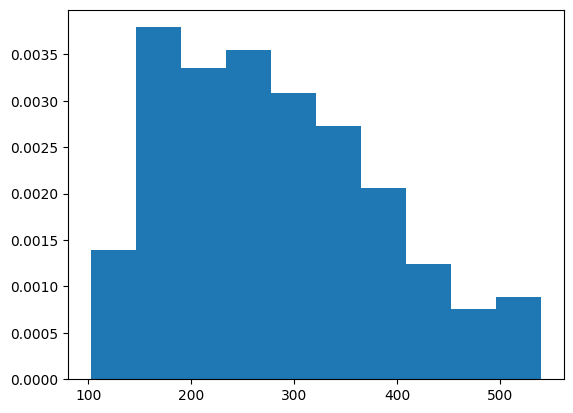

Variable  BlastFurnaceSlag


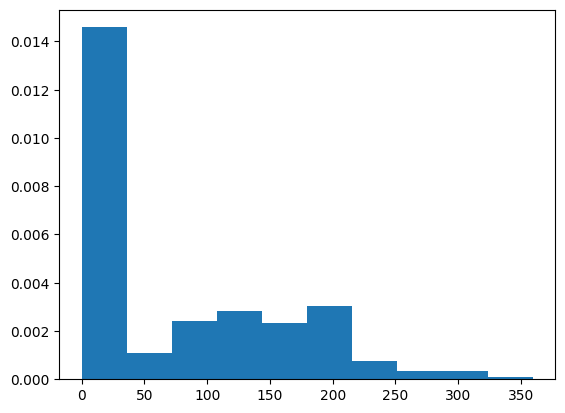

Variable  FlyAsh


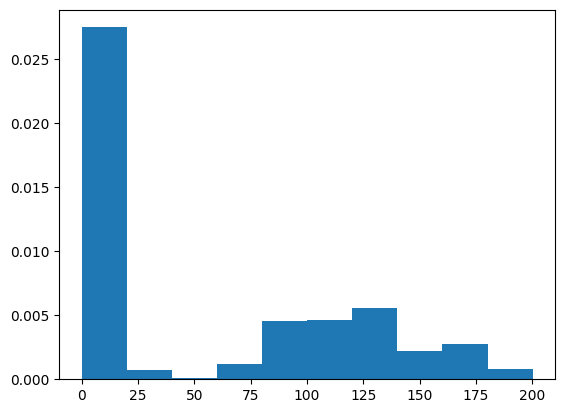

Variable  Water


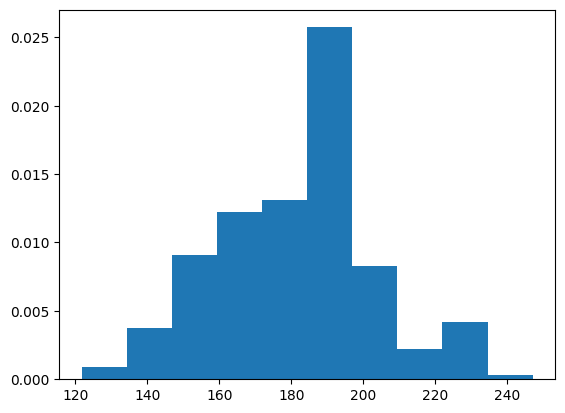

Variable  Superplasticizer


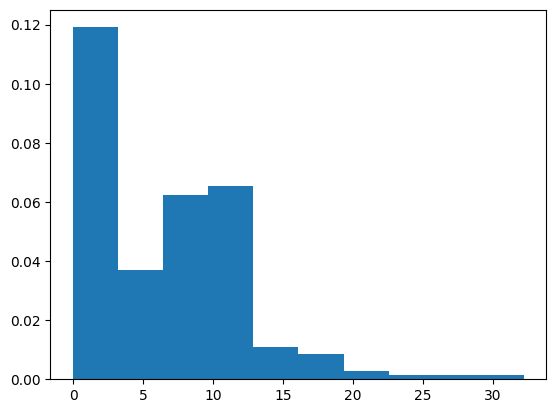

Variable  CoarseAggregate


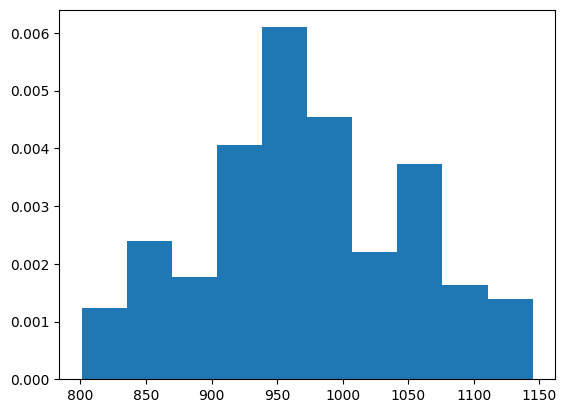

Variable  FineAggregare


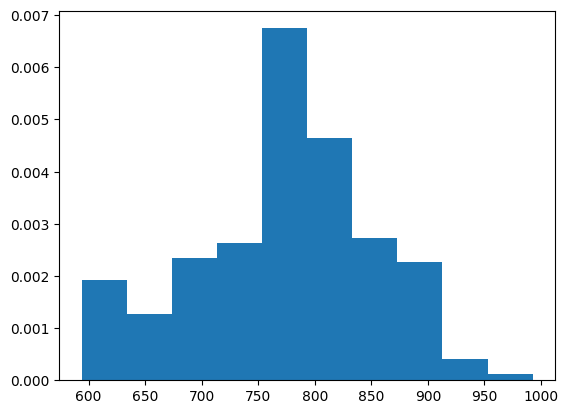

Variable  Age


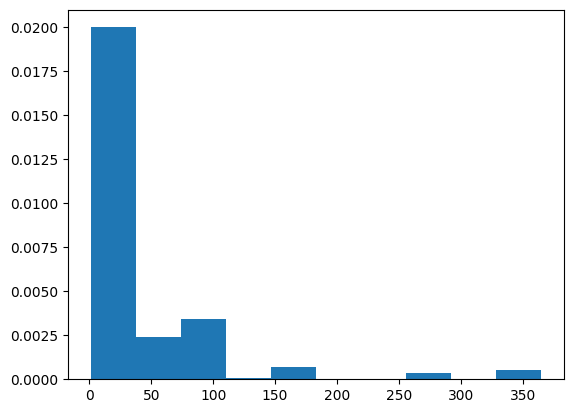

Variable  CC_Strength


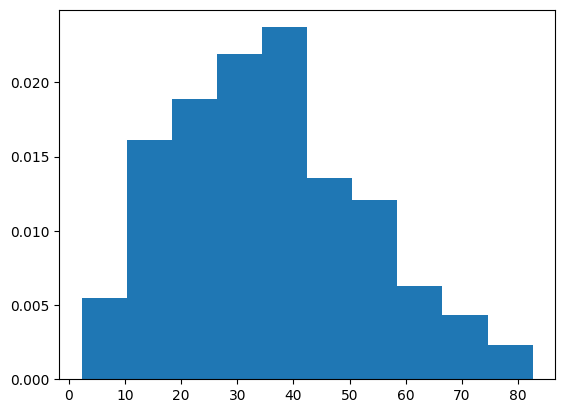

In [4]:
#histogramme de chaque variable
for name in data.columns:
  print('Variable ', name)
  plt.hist(data[name],density=True)
  plt.show()

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [6]:
from sklearn import linear_model

cl = linear_model.Lasso(alpha=0.1)

cl.fit(X, y)
print(cl.coef_)

[ 0.11963651  0.10365413  0.08784001 -0.15206524  0.2839412   0.0176514
  0.019872    0.11417848]


In [7]:
# Normalisation robuste qui nous epargne de l'effet des outliers
from sklearn.preprocessing import RobustScaler

scale_data=RobustScaler().fit_transform(X)
scale_data.shape

(1030, 8)

In [8]:
norm_data=pd.DataFrame(scale_data)
norm_data

,0,1,2,3,4,5,6,7
0,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.739220,-1.112413,0.000000
1,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.893224,-1.112413,0.000000
2,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,4.938776
3,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,6.877551
4,-0.471372,0.772298,0.000000,0.258303,-0.625000,0.106776,0.494250,6.775510
...,...,...,...,...,...,...,...,...
1025,0.022205,0.657573,0.763507,-0.199262,0.250984,-1.005133,-0.120473,0.000000
1026,0.312768,-0.153900,0.977425,0.405904,0.398622,-1.541068,0.364213,0.000000
1027,-0.789215,0.821266,0.918238,0.284133,-0.024606,-0.776181,0.005266,0.000000
1028,-0.721967,1.152151,0.000000,-0.346863,0.487205,0.221766,0.100913,0.000000


In [9]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age"]
curr_col_names = list(norm_data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

normData = norm_data.rename(columns=mapper)

normData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age
0,1.694528,-0.153900,0.0,-0.848708,-0.378937,0.739220,-1.112413,0.000000
1,1.694528,-0.153900,0.0,-0.848708,-0.378937,0.893224,-1.112413,0.000000
2,0.378113,0.842952,0.0,1.586716,-0.625000,-0.369610,-1.993659,4.938776
3,0.378113,0.842952,0.0,1.586716,-0.625000,-0.369610,-1.993659,6.877551
4,-0.471372,0.772298,0.0,0.258303,-0.625000,0.106776,0.494250,6.775510


Variable  Cement


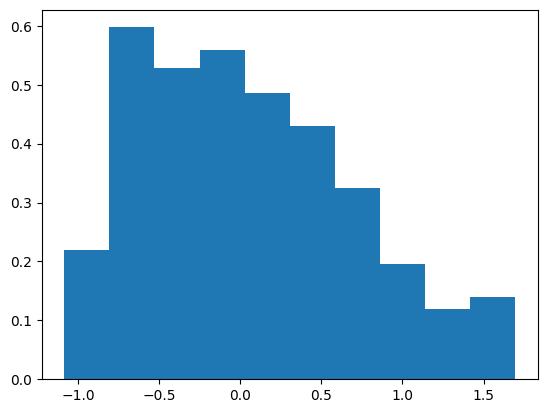

Variable  BlastFurnaceSlag


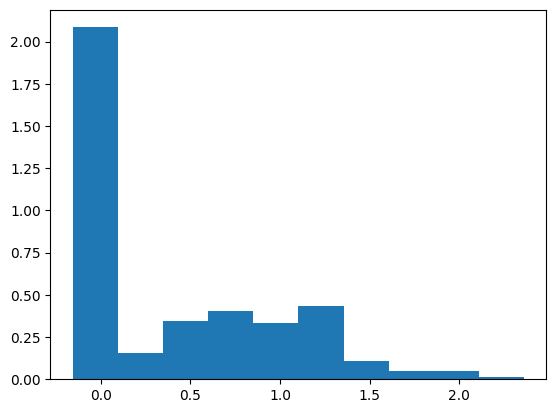

Variable  FlyAsh


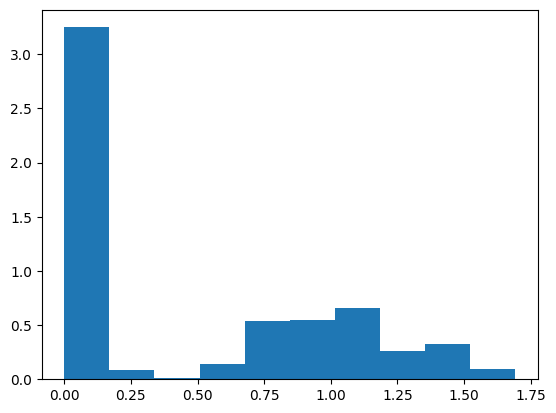

Variable  Water


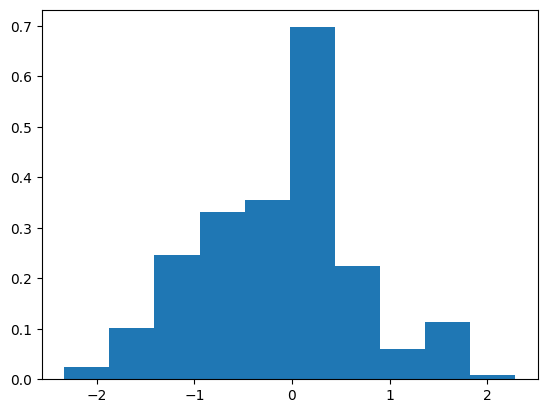

Variable  Superplasticizer


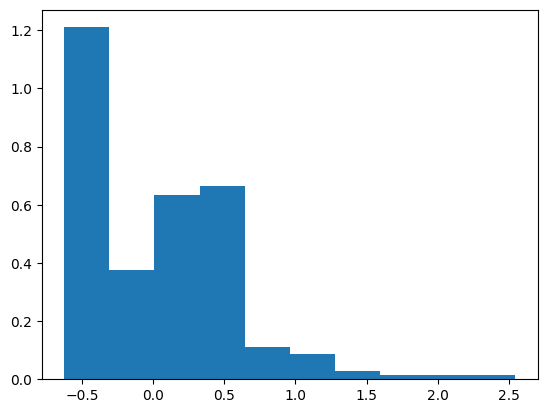

Variable  CoarseAggregate


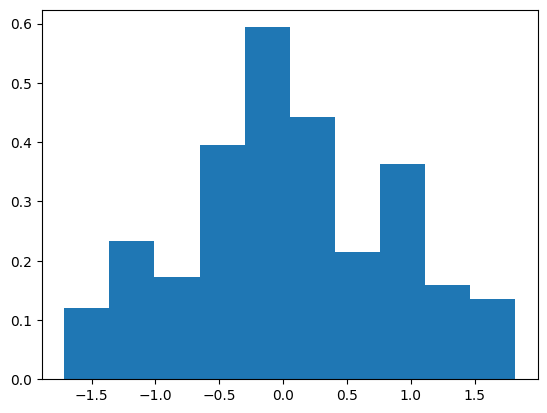

Variable  FineAggregare


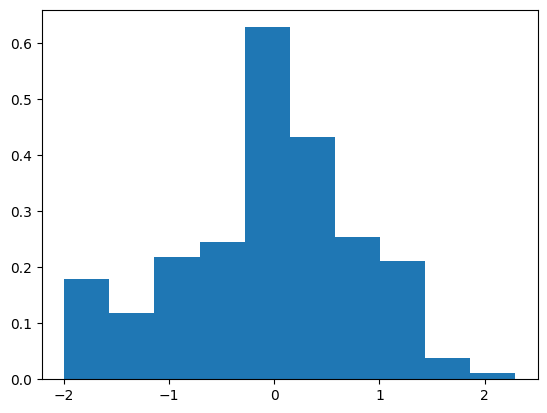

Variable  Age


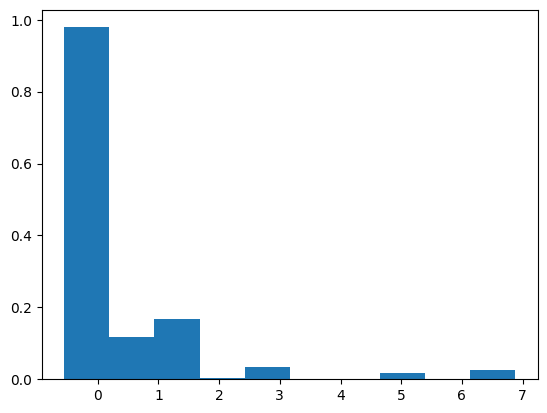

In [10]:
#histogramme de chaque variable
for name in normData.columns:
  print('Variable ', name)
  plt.hist(normData[name],density=True)
  plt.show()

### Commentaire: 
Nous observons que la normalisation robuste ne modifie pas la distribution de nos donnees tout comme la normalisation standard.

Elle modifie juste l'intervalle des valeurs c'est a dire qu'elle la reduit.

In [11]:
normData

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age
0,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.739220,-1.112413,0.000000
1,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.893224,-1.112413,0.000000
2,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,4.938776
3,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,6.877551
4,-0.471372,0.772298,0.000000,0.258303,-0.625000,0.106776,0.494250,6.775510
...,...,...,...,...,...,...,...,...
1025,0.022205,0.657573,0.763507,-0.199262,0.250984,-1.005133,-0.120473,0.000000
1026,0.312768,-0.153900,0.977425,0.405904,0.398622,-1.541068,0.364213,0.000000
1027,-0.789215,0.821266,0.918238,0.284133,-0.024606,-0.776181,0.005266,0.000000
1028,-0.721967,1.152151,0.000000,-0.346863,0.487205,0.221766,0.100913,0.000000


### Commentaire  : On constate que:
Sans normalisation, nous avons l'ordre suivant pour les caracteristiques:superplastifiant, ciment, age,scories, cendre voallante, aggregats fin, aggregats de coarse,  et finalemnt l'eau.

Apres la normalisation,on obtient plutot l'ordre suivant : ciment, scories, cendre volante, age, superplastifiant, aggregat de coarse, aggregat fin et l'eau.

Cela signifie que si nous selection 7 variables pertinentes, on aura les meme variables  mais si nous selectionnons moins de 7 variables comme variables pertinentes, on aura des resultats differents selon que nous ayons normalise ou pas.

##### Regression de Lasso pour la selection de variable

In [12]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1, random_state=42)

clf.fit(normData, y)
print(clf.coef_)

[15.73441032 11.38679459  6.86187426 -5.69964405  2.85733821  0.
 -0.01951756  5.43509998]


In [13]:
# rand_ = [np.arange()]

In [14]:
from numpy.random import randint,randn
from numpy.random import seed
seed(1)
values = randn(1, 100)
values

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
         1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
        -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
        -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
        -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
        -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
        -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
        -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
        -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
         0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
         0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
        -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
        -0.07557171,  1.13162939,  1.51981682,  2.1

In [15]:
alpha_positif = [ val for val in values[0] if val >0]

In [16]:
alpha_positif[:10]

[1.6243453636632417,
 0.8654076293246785,
 1.74481176421648,
 0.31903909605709857,
 1.462107937044974,
 1.1337694423354374,
 0.04221374671559283,
 0.5828152137158222,
 1.1447237098396141,
 0.9015907205927955]

In [17]:
def look_lasso_solution(alpha_positif):
    sol = []
    for coef in alpha_positif:
        clf = linear_model.Lasso(alpha=coef, random_state=42)
        clf.fit(normData, y)
        feature_importance_dict = dict(zip(normData.columns, clf.coef_))
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
        sol.append({
            "feature_importance": sorted_feature_importance,
            "alpha": coef,
        })
    return sol

In [18]:
solution = look_lasso_solution(alpha_positif[:12])

Cement: 8.1620368806741
Age: 3.8310452769327696
Superplasticizer: 3.5755268620259675
Water: -3.2231589663429996
BlastFurnaceSlag: 2.329618623907069
FineAggregare: -0.17081639619646102
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.6243453636632417


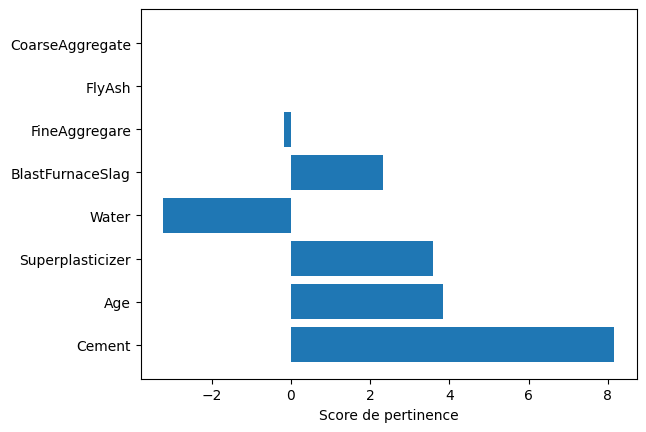

Cement: 9.622495306792644
Water: -5.251896972062335
Age: 4.541674321977146
BlastFurnaceSlag: 4.452434936003249
Superplasticizer: 4.210468251683472
FineAggregare: -1.3955081465392791
CoarseAggregate: -0.6283139159151099
FlyAsh: 0.0
alpha =  0.8654076293246785


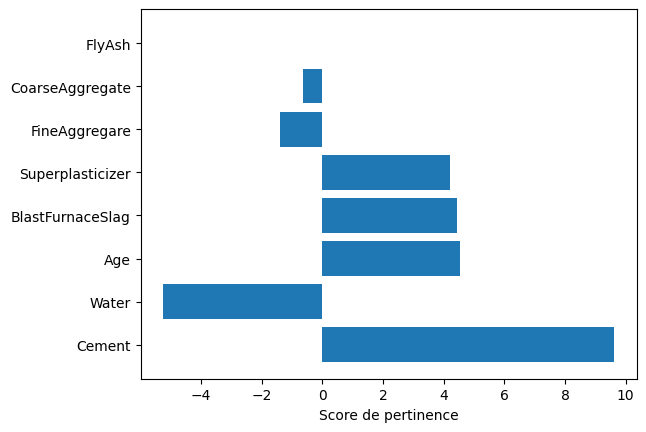

Cement: 7.883154940639518
Age: 3.720181544360788
Superplasticizer: 3.3870973327150655
Water: -2.9912081568594986
BlastFurnaceSlag: 1.9334815216063657
FineAggregare: -0.036018562563850894
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.74481176421648


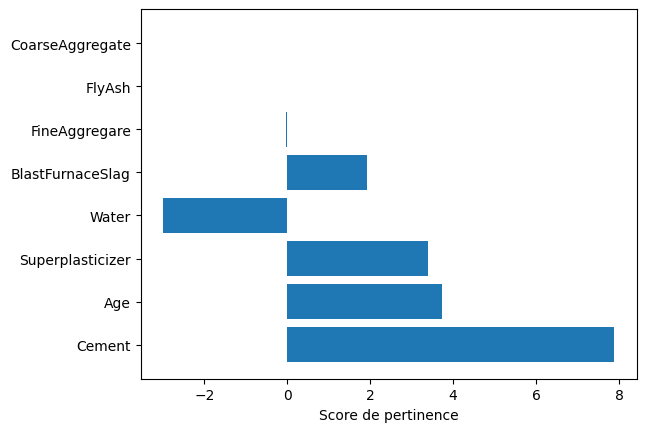

Cement: 12.240185528057896
BlastFurnaceSlag: 7.573400632612777
Water: -6.353371313555061
Age: 5.122099740169281
Superplasticizer: 3.7304899252054584
FlyAsh: 2.48799039594523
FineAggregare: -1.476492294978671
CoarseAggregate: -0.867012323716336
alpha =  0.31903909605709857


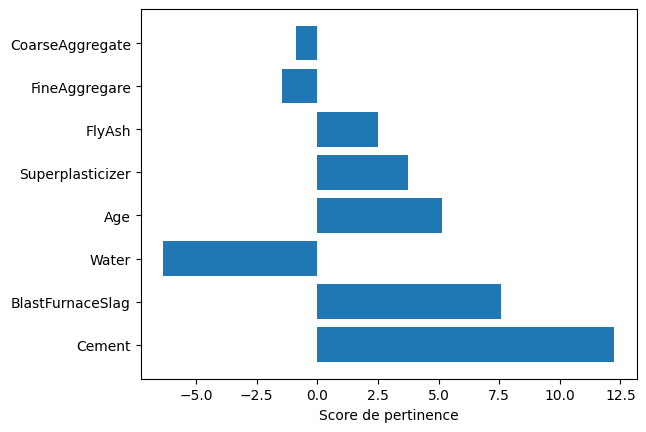

Cement: 8.537566722352164
Age: 3.9803631699036854
Superplasticizer: 3.8292331054001223
Water: -3.5356611297156384
BlastFurnaceSlag: 2.8631026061393885
FineAggregare: -0.35240157113405435
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.462107937044974


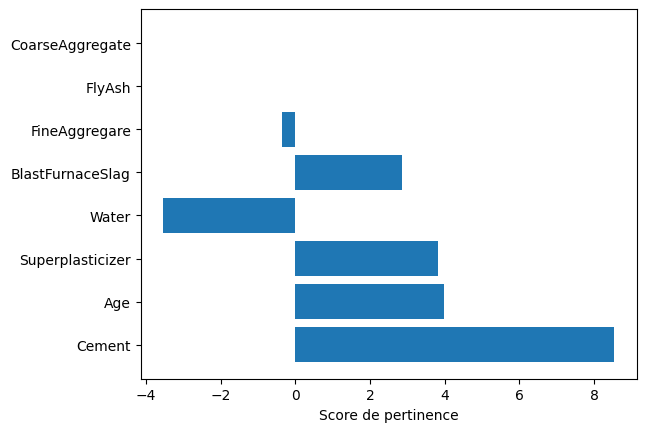

Cement: 9.297798359410871
Superplasticizer: 4.342948673371185
Age: 4.282499263740604
Water: -4.167570083523786
BlastFurnaceSlag: 3.9428238380477607
FineAggregare: -0.7196927122669095
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.1337694423354374


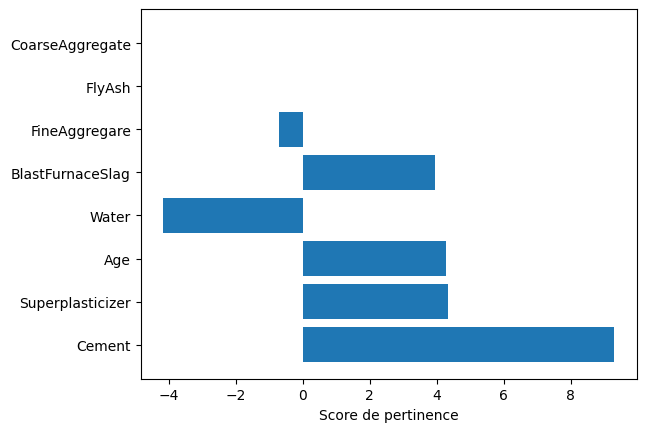

Cement: 16.297788744369587
BlastFurnaceSlag: 12.017862171276281
FlyAsh: 7.6371961619863615
Water: -5.749002829612874
Age: 5.506389713157189
Superplasticizer: 2.6862726870955904
CoarseAggregate: 0.11596670631511624
FineAggregare: 0.012732670503154143
alpha =  0.04221374671559283


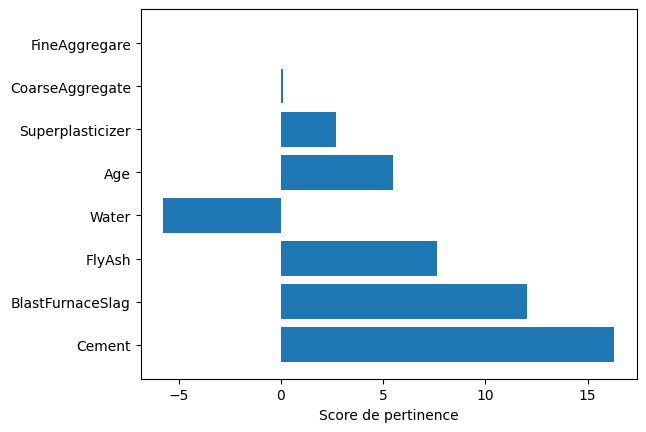

Cement: 9.96379704320107
Water: -6.394292864138496
BlastFurnaceSlag: 4.987026573198996
Age: 4.814344492822588
Superplasticizer: 4.069088946606689
FineAggregare: -2.1086296649813043
CoarseAggregate: -1.2956054401260872
FlyAsh: 0.0
alpha =  0.5828152137158222


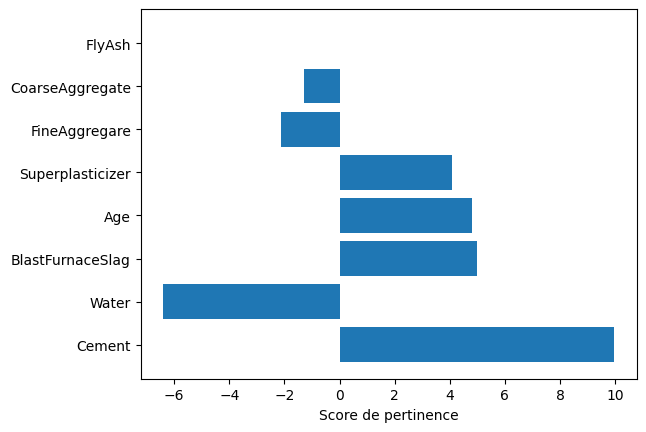

Cement: 9.272440311832762
Superplasticizer: 4.325818121683263
Age: 4.272417693753843
Water: -4.146472557402961
BlastFurnaceSlag: 3.9068023422062015
FineAggregare: -0.7074333064436096
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.1447237098396141


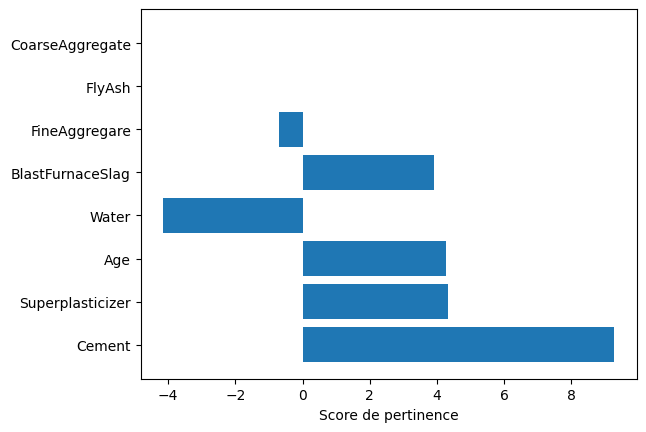

Cement: 9.578941707617957
Water: -5.105326121927243
Age: 4.506747490744693
BlastFurnaceSlag: 4.384131838745411
Superplasticizer: 4.2288208382655155
FineAggregare: -1.3040343960516683
CoarseAggregate: -0.5426874594174855
FlyAsh: 0.0
alpha =  0.9015907205927955


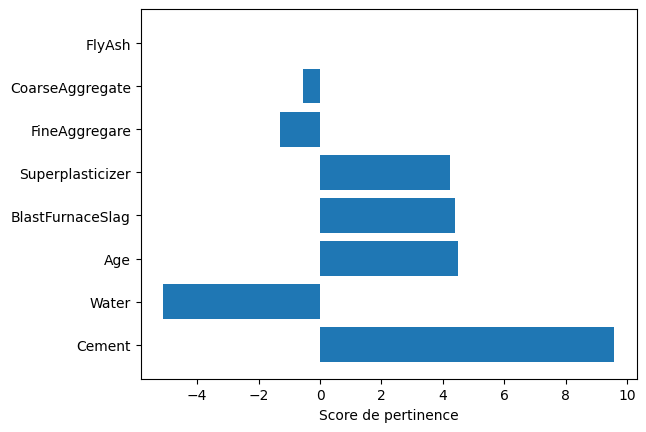

Cement: 10.059588383109311
Water: -6.721472167778686
BlastFurnaceSlag: 5.137762155101217
Age: 4.891962841613088
Superplasticizer: 4.026827547490802
FineAggregare: -2.3126945570090442
CoarseAggregate: -1.48681645591167
FlyAsh: 0.0
alpha =  0.5024943389018682


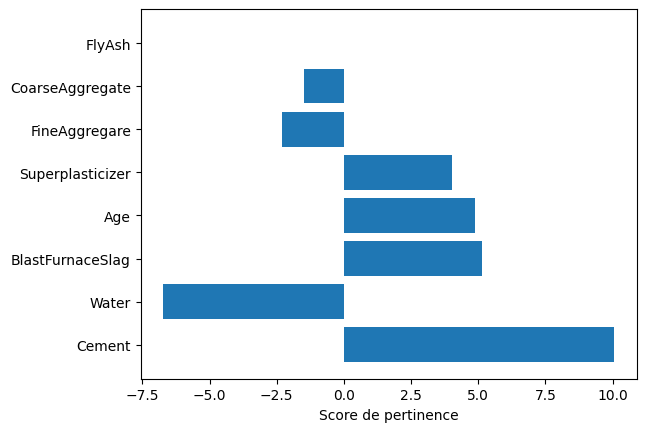

Cement: 9.579826152113997
Water: -5.108302541422692
Age: 4.507456751155605
BlastFurnaceSlag: 4.385518872184125
Superplasticizer: 4.228448151633457
FineAggregare: -1.3058919567741576
CoarseAggregate: -0.5444262789318078
FlyAsh: 0.0
alpha =  0.9008559492644118


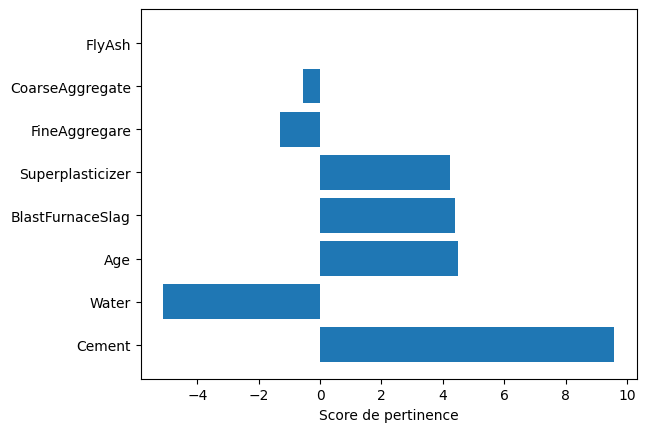

In [19]:
for elm in solution:
    for feature, importance in elm["feature_importance"]:
        print(f"{feature}: {importance}")
    plt.barh(*zip(* elm["feature_importance"]))
    plt.xlabel("Score de pertinence")
    print("alpha = ",elm['alpha'])
    plt.show()

In [20]:
look_lasso_solution(alpha_positif[:2])

[{'feature_importance': [('Cement', 8.1620368806741),
   ('Age', 3.8310452769327696),
   ('Superplasticizer', 3.5755268620259675),
   ('Water', -3.2231589663429996),
   ('BlastFurnaceSlag', 2.329618623907069),
   ('FineAggregare', -0.17081639619646102),
   ('FlyAsh', 0.0),
   ('CoarseAggregate', -0.0)],
  'alpha': 1.6243453636632417},
 {'feature_importance': [('Cement', 9.622495306792644),
   ('Water', -5.251896972062335),
   ('Age', 4.541674321977146),
   ('BlastFurnaceSlag', 4.452434936003249),
   ('Superplasticizer', 4.210468251683472),
   ('FineAggregare', -1.3955081465392791),
   ('CoarseAggregate', -0.6283139159151099),
   ('FlyAsh', 0.0)],
  'alpha': 0.8654076293246785}]

### Commentaire  : On constate que:
POur ces 10 valeurs de alpha, un sous ensemble de variables est toujours selectione a savoir : Ciment, Age,Scories et Superplastifiant. On peut conclure que peurt importe la valeur de alpha, ces variables sont effectivement les plus pertinentes pour notre prediction.
De meme, pour certaines variables de alpha(sensiblement 0.03), on constate une cinquieme variable qui apparait a savoir les cendres volantes.

Conclusion : ces 5 variables sont les plus pertinentes.


Regression de Ridge

Cement: 17.834968406005203
BlastFurnaceSlag: 13.72076795929403
FlyAsh: 9.2754283373541
Age: 5.568502375648947
Water: -4.676549583350501
Superplasticizer: 2.962223660765536
FineAggregare: 1.1735729636757664
CoarseAggregate: 1.1670041494104482
alpha =  1.6243453636632417


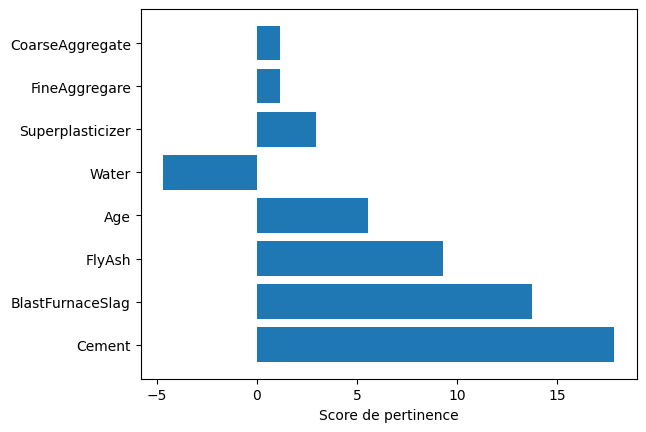

Cement: 18.2964116750777
BlastFurnaceSlag: 14.216420256422701
FlyAsh: 9.771717860973586
Age: 5.581353683052911
Water: -4.412905903636237
Superplasticizer: 2.956558730831038
FineAggregare: 1.4818634321570652
CoarseAggregate: 1.4255039740522595
alpha =  0.8654076293246785


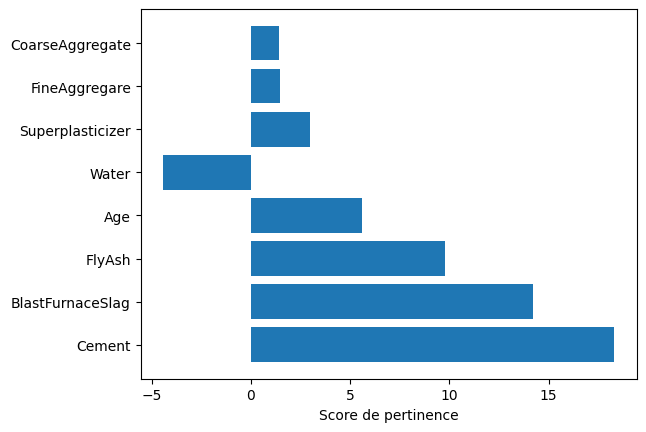

Cement: 17.76565238911303
BlastFurnaceSlag: 13.646343827881255
FlyAsh: 9.200907467092724
Age: 5.566533057043194
Water: -4.715773722249951
Superplasticizer: 2.9633352326019162
CoarseAggregate: 1.1283757623216393
FineAggregare: 1.1274515574629842
alpha =  1.74481176421648


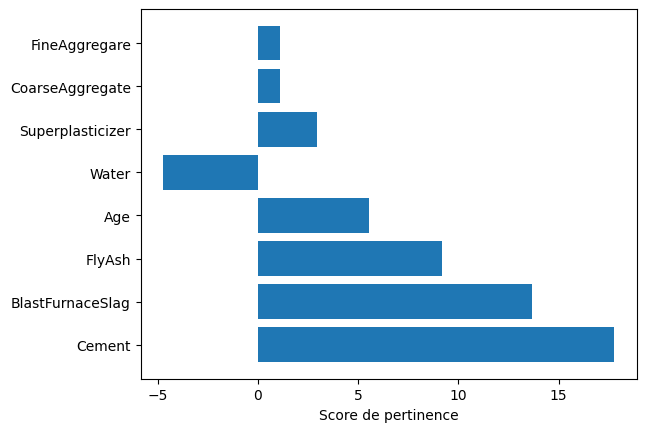

Cement: 18.657665583805112
BlastFurnaceSlag: 14.60468165590383
FlyAsh: 10.160460164353305
Age: 5.591125624454346
Water: -4.2036633083887995
Superplasticizer: 2.954097375229034
FineAggregare: 1.7246255111255377
CoarseAggregate: 1.6293944140322245
alpha =  0.31903909605709857


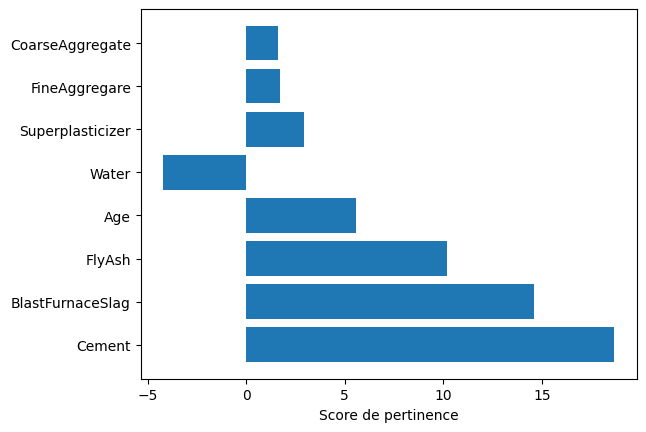

Cement: 17.92995539958754
BlastFurnaceSlag: 13.822768324952104
FlyAsh: 9.377561076965355
Age: 5.571183974383714
Water: -4.622632926876712
Superplasticizer: 2.9608139532374467
FineAggregare: 1.2368579825641892
CoarseAggregate: 1.2200269768820227
alpha =  1.462107937044974


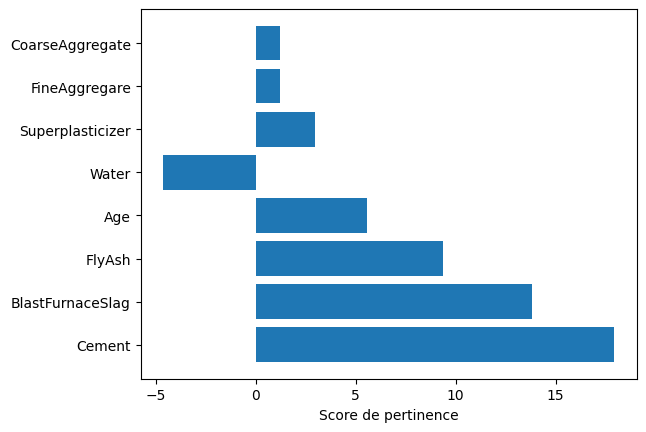

Cement: 18.12816672327919
BlastFurnaceSlag: 14.035662952450185
FlyAsh: 9.590730307491514
Age: 5.576718360759483
Water: -4.509524856399713
Superplasticizer: 2.9582839576500652
FineAggregare: 1.369214116135903
CoarseAggregate: 1.3309904063092228
alpha =  1.1337694423354374


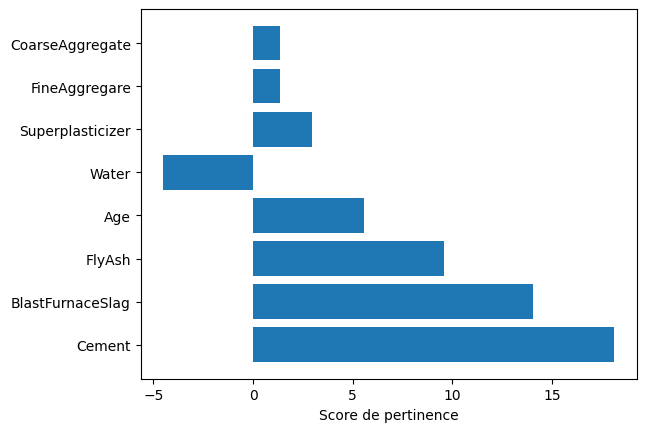

Cement: 18.851018793477742
BlastFurnaceSlag: 14.812563671178841
FlyAsh: 10.368589827883197
Age: 5.596260787701784
Water: -4.090729145384455
Superplasticizer: 2.9534416772130796
FineAggregare: 1.8550232593449456
CoarseAggregate: 1.739025028944926
alpha =  0.04221374671559283


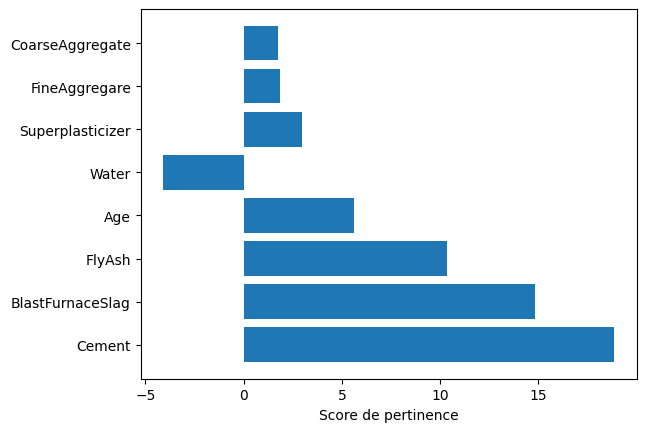

Cement: 18.4800077279944
BlastFurnaceSlag: 14.413718803747354
FlyAsh: 9.969263459089936
Age: 5.586349848940815
Water: -4.306860103661157
Superplasticizer: 2.9551011965147476
FineAggregare: 1.60509380148316
CoarseAggregate: 1.5289673425033747
alpha =  0.5828152137158222


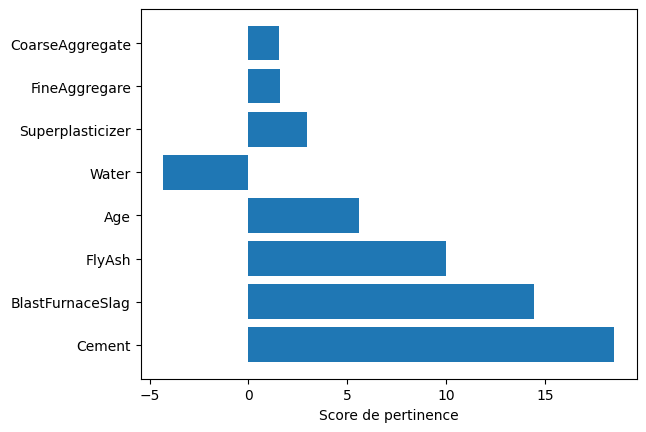

Cement: 18.121420838554663
BlastFurnaceSlag: 14.028416295773466
FlyAsh: 9.583474356095529
Age: 5.576531332046858
Water: -4.513387344420181
Superplasticizer: 2.9583611039879782
FineAggregare: 1.36470308055441
CoarseAggregate: 1.327206967915583
alpha =  1.1447237098396141


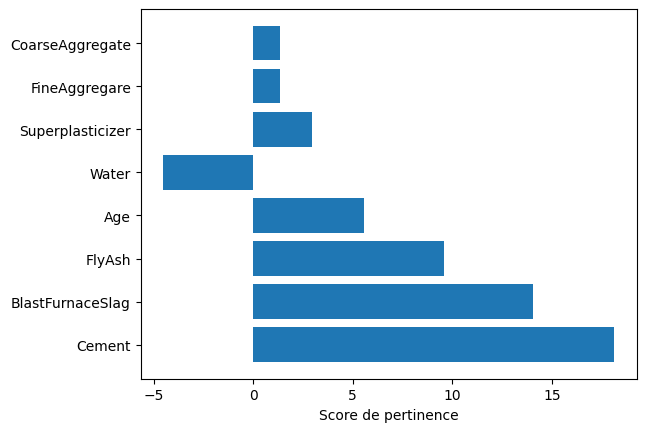

Cement: 18.27338771852696
BlastFurnaceSlag: 14.19168144986556
FlyAsh: 9.746947740594473
Age: 5.580722624294073
Water: -4.426160177516567
Superplasticizer: 2.9567724914280356
FineAggregare: 1.4664316671317152
CoarseAggregate: 1.4125528241681156
alpha =  0.9015907205927955


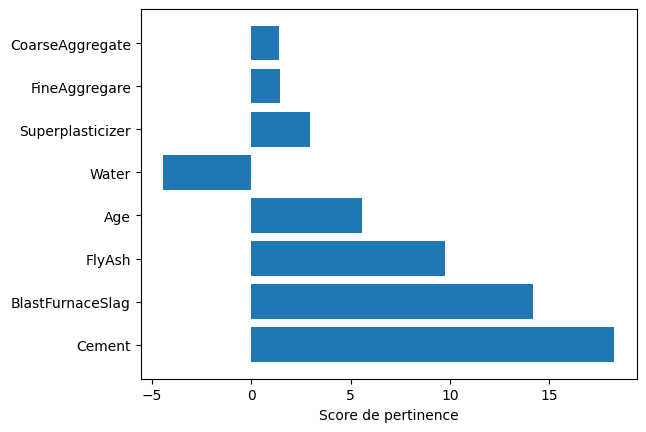

Cement: 18.53344657839817
BlastFurnaceSlag: 14.47115513391141
FlyAsh: 10.026770713919438
Age: 5.587792336958114
Water: -4.275877785189177
Superplasticizer: 2.9547579107719835
FineAggregare: 1.6410194297728586
CoarseAggregate: 1.5591439982300257
alpha =  0.5024943389018682


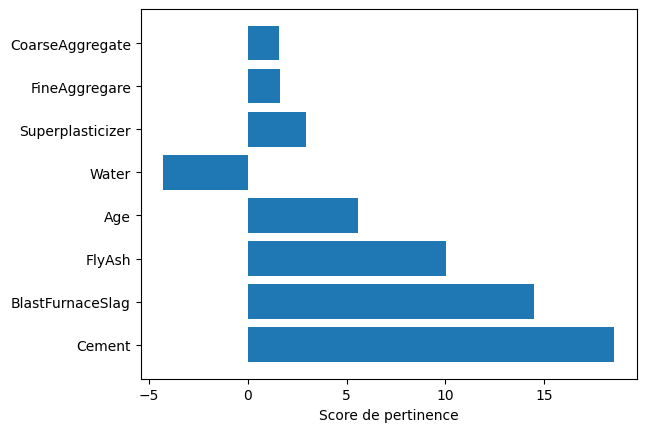

Cement: 18.27385419773312
BlastFurnaceSlag: 14.192182665020237
FlyAsh: 9.747449590852495
Age: 5.580735420093232
Water: -4.425891737990536
Superplasticizer: 2.9567680909655993
FineAggregare: 1.4667442744184613
CoarseAggregate: 1.4128151688660038
alpha =  0.9008559492644118


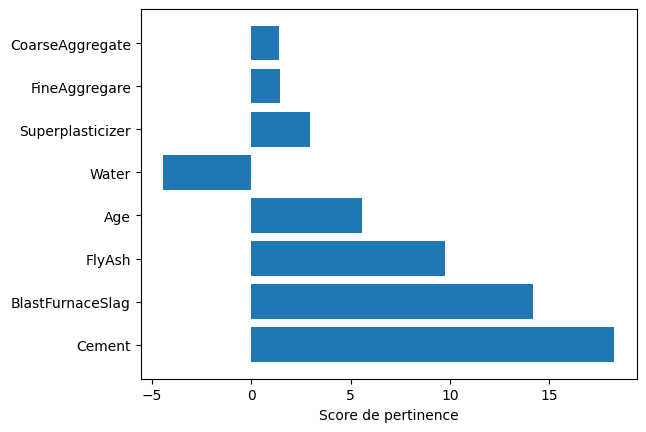

In [21]:
def look_ridge_solution(alpha_positif):
    sol = []
    for coef in alpha_positif:
        clf = linear_model.Ridge(alpha=coef, random_state=42)
        clf.fit(normData, y)
        feature_importance_dict = dict(zip(normData.columns, clf.coef_))
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
        sol.append({
            "feature_importance": sorted_feature_importance,
            "alpha": coef,
        })
    return sol

solution_ridge = look_ridge_solution(alpha_positif[:12])

for elm in solution_ridge:
    for feature, importance in elm["feature_importance"]:
        print(f"{feature}: {importance}")
    plt.barh(*zip(* elm["feature_importance"]))
    plt.xlabel("Score de pertinence")
    print("alpha = ",elm['alpha'])
    plt.show()

### Commentaire :
On constate que: Ridge selectionne a chaque fois 7 variables pertinentes. Il est moins aggressif que Lasso.

Cement: 3.372062451237674
Age: 2.7675318985490573
Water: -2.4306164339098606
Superplasticizer: 2.0081872813801414
FineAggregare: -1.0655987571650822
CoarseAggregate: -0.8581861715691868
BlastFurnaceSlag: 0.7073448098813405
FlyAsh: -0.0
alpha =  1.6243453636632417


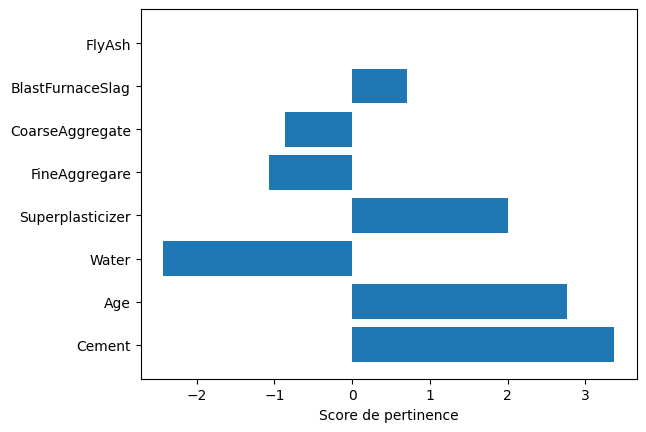

Cement: 5.060319793324803
Water: -3.871103640324204
Age: 3.606554838610899
Superplasticizer: 2.9925959414779113
FineAggregare: -1.8422977040587518
BlastFurnaceSlag: 1.6214616089195903
CoarseAggregate: -1.4354865669570347
FlyAsh: -0.0
alpha =  0.8654076293246785


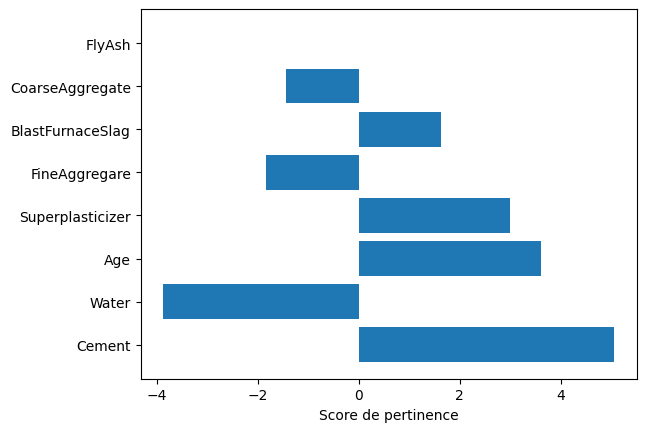

Cement: 3.188876547814873
Age: 2.6637838162578027
Water: -2.2757839111580767
Superplasticizer: 1.891225239205046
FineAggregare: -0.9795578770387069
CoarseAggregate: -0.7902954110441265
BlastFurnaceSlag: 0.6177367728142195
FlyAsh: -0.0
alpha =  1.74481176421648


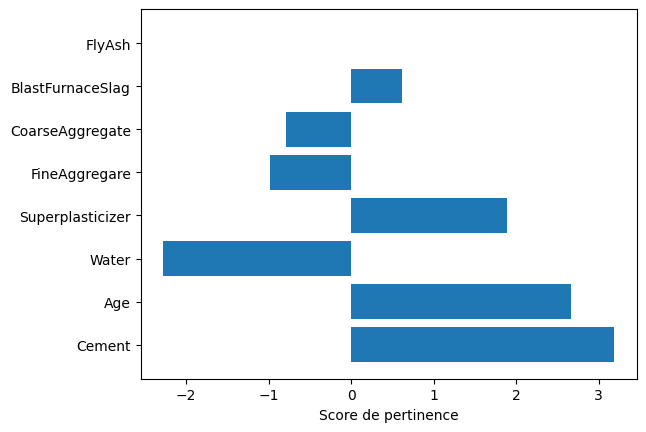

Cement: 7.53826467906805
Water: -5.997049931437336
Age: 4.546279949006362
Superplasticizer: 3.9708033612532505
BlastFurnaceSlag: 3.297830517843068
FineAggregare: -2.836120070913715
CoarseAggregate: -2.105289194577345
FlyAsh: -0.0
alpha =  0.31903909605709857


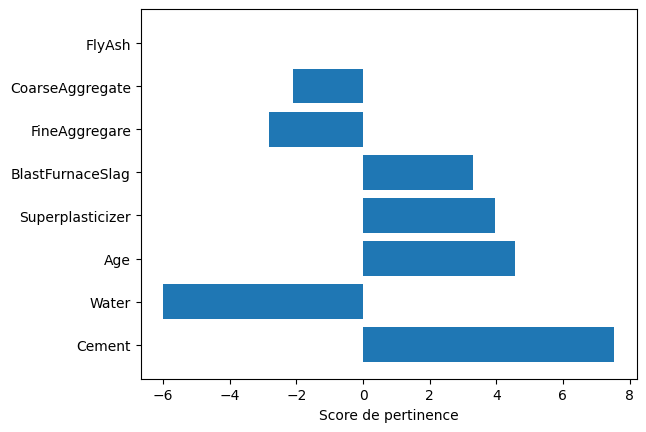

Cement: 3.6464139020316386
Age: 2.917740362828545
Water: -2.6632098607442956
Superplasticizer: 2.180184165621594
FineAggregare: -1.1941033244864032
CoarseAggregate: -0.9580166800310778
BlastFurnaceSlag: 0.8448903439075148
FlyAsh: -0.0
alpha =  1.462107937044974


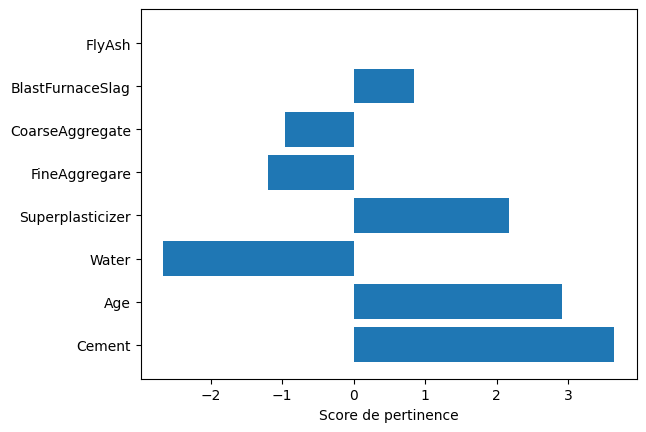

Cement: 4.326911005550078
Age: 3.2658770505910977
Water: -3.2431019830476697
Superplasticizer: 2.5881802816063466
FineAggregare: -1.5098848000710685
BlastFurnaceSlag: 1.2040276289188567
CoarseAggregate: -1.1957847519296325
FlyAsh: -0.0
alpha =  1.1337694423354374


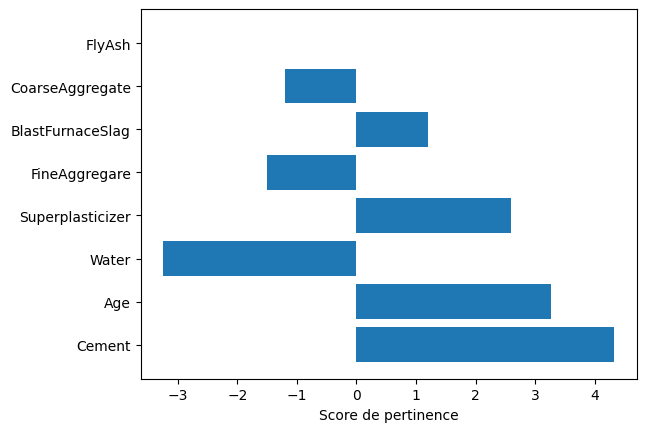

Cement: 12.32885670398739
BlastFurnaceSlag: 7.854461507827301
Water: -7.147630887671396
Age: 5.331105307853705
Superplasticizer: 3.4082950669579897
FlyAsh: 3.3910847851628976
FineAggregare: -2.1327235694785966
CoarseAggregate: -1.5406647831215812
alpha =  0.04221374671559283


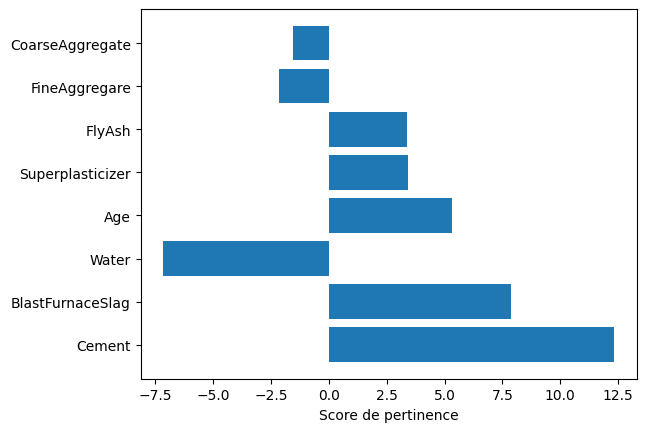

Cement: 6.109568583714546
Water: -4.7717473000657735
Age: 4.04070672188778
Superplasticizer: 3.4910972897095167
FineAggregare: -2.293884213166381
BlastFurnaceSlag: 2.278317358610585
CoarseAggregate: -1.7464843206180596
FlyAsh: -0.0
alpha =  0.5828152137158222


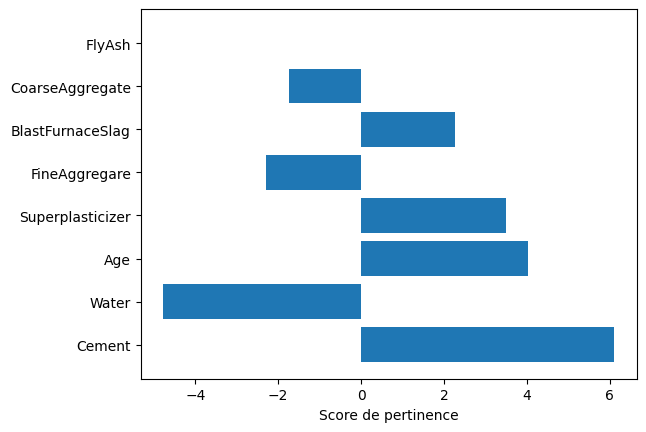

Cement: 4.300884869855254
Age: 3.25315864197994
Water: -3.2208592240766674
Superplasticizer: 2.57311328823399
FineAggregare: -1.4979114318073679
BlastFurnaceSlag: 1.189806031069047
CoarseAggregate: -1.1869557907263413
FlyAsh: -0.0
alpha =  1.1447237098396141


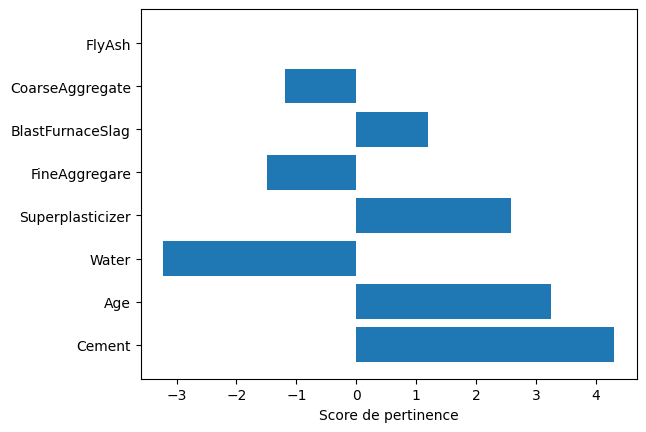

Cement: 4.949249676345667
Water: -3.7758295865388694
Age: 3.5570569710674564
Superplasticizer: 2.9340082505534166
FineAggregare: -1.7926495656667067
BlastFurnaceSlag: 1.5561241630474532
CoarseAggregate: -1.4003170564419023
FlyAsh: -0.0
alpha =  0.9015907205927955


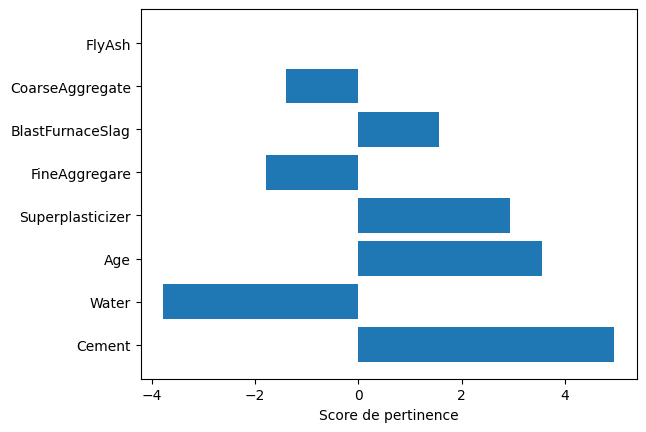

Cement: 6.484828175671092
Water: -5.094068875577141
Age: 4.182498110717904
Superplasticizer: 3.6418504497349713
BlastFurnaceSlag: 2.531555930334432
FineAggregare: -2.4459066791707627
CoarseAggregate: -1.8481856725996524
FlyAsh: -0.0
alpha =  0.5024943389018682


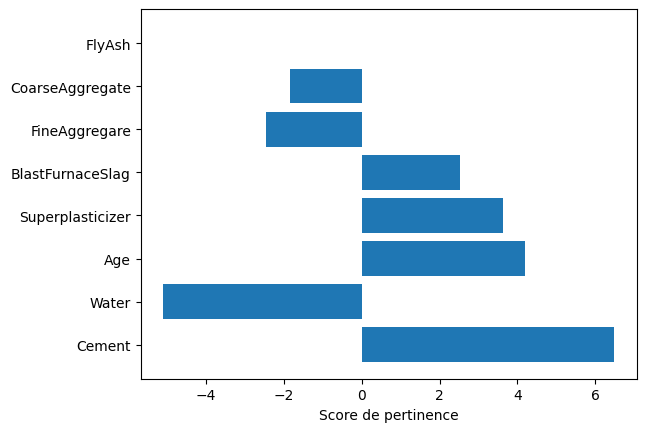

Cement: 4.951462392379852
Water: -3.7777272138014144
Age: 3.558050092870335
Superplasticizer: 2.935185229005567
FineAggregare: -1.7936414084611967
BlastFurnaceSlag: 1.557418261534723
CoarseAggregate: -1.4010217333291852
FlyAsh: -0.0
alpha =  0.9008559492644118


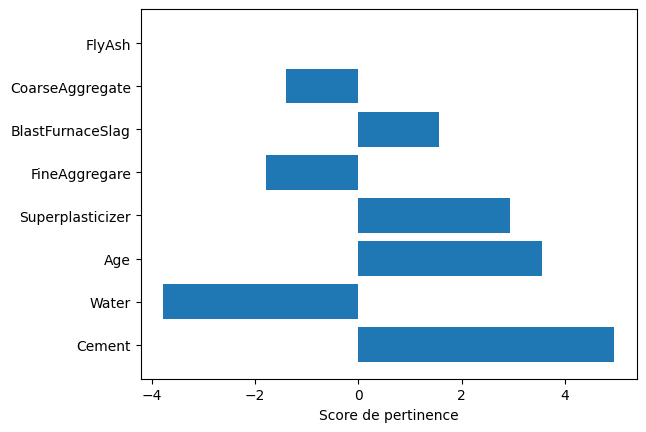

In [22]:
def look_elastic_solution(alpha_positif):
    sol = []
    for coef in alpha_positif:
        clf = linear_model.ElasticNet(alpha=coef, random_state=42)
        clf.fit(normData, y)
        feature_importance_dict = dict(zip(normData.columns, clf.coef_))
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
        sol.append({
            "feature_importance": sorted_feature_importance,
            "alpha": coef,
        })
    return sol

solution_elastic = look_elastic_solution(alpha_positif[:12])

for elm in solution_elastic:
    for feature, importance in elm["feature_importance"]:
        print(f"{feature}: {importance}")
    plt.barh(*zip(* elm["feature_importance"]))
    plt.xlabel("Score de pertinence")
    print("alpha = ",elm['alpha'])
    plt.show()

### Commentaire :
On constate que: Elastic Net qui est la combinaison de Ridge et de Lasso se comporte exactement comme Lasso. Ce qui pourrait etre du au parametre alpha qui probablement est plus favorable a la normalisation L1. 

Pour ameliorer la prediction, on va proceder a l'isolation des valeurs aberrantes. Et eventuellement utiliser la methode de l'article 2 pour optimiser les variables pertinentes. Penser aussi a stocker le meilleur modele catboost

In [23]:
# ranger les indices selon l'ordre croissant et recuperer les 7 dernieres indices correspondants aux 7 variables les plus pertinentes.
b=np.argsort(clf.coef_)[-7:]
b

array([6, 5, 4, 7, 2, 1, 0])

In [24]:
type(normData)

pandas.core.frame.DataFrame

In [25]:
numpyData = normData.to_numpy()
type(numpyData)

numpy.ndarray

In [26]:
tab=[np.reshape(numpyData[:,x], (numpyData.shape[0],1))  for x in b]

In [27]:
d = np.concatenate(tab, axis=1)

In [28]:
d_data=pd.DataFrame(d)
d_data

,0,1,2,3,4,5,6
0,-1.112413,0.739220,-0.378937,0.000000,0.000000,-0.153900,1.694528
1,-1.112413,0.893224,-0.378937,0.000000,0.000000,-0.153900,1.694528
2,-1.993659,-0.369610,-0.625000,4.938776,0.000000,0.842952,0.378113
3,-1.993659,-0.369610,-0.625000,6.877551,0.000000,0.842952,0.378113
4,0.494250,0.106776,-0.625000,6.775510,0.000000,0.772298,-0.471372
...,...,...,...,...,...,...,...
1025,-0.120473,-1.005133,0.250984,0.000000,0.763507,0.657573,0.022205
1026,0.364213,-1.541068,0.398622,0.000000,0.977425,-0.153900,0.312768
1027,0.005266,-0.776181,-0.024606,0.000000,0.918238,0.821266,-0.789215
1028,0.100913,0.221766,0.487205,0.000000,0.000000,1.152151,-0.721967


In [29]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

kf=KFold(n_splits=10,shuffle=True,random_state=42)

In [30]:
rmse_tab_error = []
mse_tab_error = []
mae_tab_error = []
r2_tab_error = []

In [31]:
import catboost
from catboost import CatBoostRegressor

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


for train_index, test_index in kf.split(d_data):
        
        X_train, X_test = d_data.iloc[train_index], d_data.iloc[test_index]# echantillonnage du jeu d'entrainement
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]#  echantillonnage du jeu de test

        catb= CatBoostRegressor(random_state=42, bagging_temperature= 25.71, l2_leaf_reg= 3.82, learning_rate= 0.18,
    max_bin= 1531, min_data_in_leaf= 26, random_strength= 3.10, subsample= 0.97)
        catb.fit(X_train, y_train)

        y_pred = catb.predict(X_test)

           # predict in the last fold the model trained in the 9 folds 
        rmse = mean_squared_error(y_test,y_pred,squared=False)
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        r2 = r2_score(y_test, y_pred)

        ## append each metric for each fold in its corresponding table
        rmse_tab_error.append(rmse)
        mse_tab_error.append(mse)
        mae_tab_error.append(mae)
        r2_tab_error.append(r2)

print("\n*********Test metrics*********\n")
print("\t RMSE : {:.3f} \t MSE : {:.3f} \t MAE : {:.3f} \t R2 : {:.3f}".format(np.mean(np.array(rmse_tab_error)),
                        np.mean(np.array(mse_tab_error)), np.mean(np.array(mae_tab_error)), np.mean(np.array(r2_tab_error))))

0:	learn: 15.2919182	total: 72.7ms	remaining: 1m 12s
1:	learn: 13.8804700	total: 76.4ms	remaining: 38.1s
2:	learn: 12.7222187	total: 82.2ms	remaining: 27.3s
3:	learn: 11.6813569	total: 85.4ms	remaining: 21.3s
4:	learn: 10.9171853	total: 88.6ms	remaining: 17.6s
5:	learn: 10.3732764	total: 92.1ms	remaining: 15.3s
6:	learn: 9.8016652	total: 96.2ms	remaining: 13.6s
7:	learn: 9.4084365	total: 99ms	remaining: 12.3s
8:	learn: 9.0256140	total: 102ms	remaining: 11.2s
9:	learn: 8.5278545	total: 105ms	remaining: 10.4s
10:	learn: 8.0622450	total: 107ms	remaining: 9.66s
11:	learn: 7.7204197	total: 110ms	remaining: 9.04s
12:	learn: 7.5002555	total: 113ms	remaining: 8.58s
13:	learn: 7.3321487	total: 115ms	remaining: 8.08s
14:	learn: 7.1237971	total: 117ms	remaining: 7.66s
15:	learn: 6.9835533	total: 118ms	remaining: 7.28s
16:	learn: 6.7682009	total: 120ms	remaining: 6.95s
17:	learn: 6.6310810	total: 122ms	remaining: 6.64s
18:	learn: 6.5047583	total: 125ms	remaining: 6.47s
19:	learn: 6.4204477	total: 